# Calculation of local axial and lateral angle for points from unit vector

In [2]:
import json
import pandas as pd
import numpy as np

In [3]:
from matplotlib import pyplot as plt
import math
def calKp(df1):
    _cumkp=0
    kp=[]
    for index, point in df1.iterrows():
        if index == 0: 
            kp.append(0)  
            continue
        _kp = math.sqrt( (df1.iloc[[index]].x-df1.iloc[index-1].x)**2 + 
                       (df1.iloc[[index]].y-df1.iloc[index-1].y)**2 + 
                       (df1.iloc[[index]].z-df1.iloc[index-1].z)**2 )
        _cumkp = _cumkp + _kp 
        kp.append(_cumkp)
    return kp
def calAzimuth(df1):
    _az=0
    azimuth=[]
    for index, point in df1.iterrows():
        if index == len(df1)-1:
            _az = math.atan( (df1.iloc[[index]].x-df1.iloc[index-1].x) / 
                       (df1.iloc[[index]].y-df1.iloc[index-1].y) ) 
            azimuth.append(_az)
            break
        if index == 0: 
            _az = math.atan( (df1.iloc[[index]].x-df1.iloc[index+1].x) / 
                       (df1.iloc[[index]].y-df1.iloc[index+1].y) )
            azimuth.append(_az)  
            continue
        _az12 = math.atan( (df1.iloc[[index]].x-df1.iloc[index-1].x) / 
                       (df1.iloc[[index]].y-df1.iloc[index-1].y) ) 
        _az23 = math.atan( (df1.iloc[[index]].x-df1.iloc[index+1].x) / 
                       (df1.iloc[[index]].y-df1.iloc[index+1].y) )
        _az=(_az12+_az23)/2
#         print(_az12,_az23)
        azimuth.append(_az)
    return azimuth

In [4]:

with open('Test2 (1).json', "r") as json_file:
    f=json_file.read()
    data = json.loads(f)
len(data)

6

In [5]:
wantedData=[]
for index, i in enumerate(data["elements"]):
    if i["type"]["name"]=="Line":
        name = i["name"]
        for j in i["properties"]:
            if j["name"]=="points":
                points =j["value"]
            if j["name"]=="angles":
                angles=j["value"]["value"]
                wantedData.append([name,points,angles])
                
df=pd.DataFrame(wantedData)
df.columns=["Name", "Points", "Angles"]
df

,Name,Points,Angles
0,UMBILCAL 3,"[{'x': 1149.98, 'y': -1145.21, 'z': -1446.9811...","[[-0.05946003977456018, -0.0, 0.99823068660005..."
1,WATER INJECTION 2,"[{'x': 722.37, 'y': 738.25, 'z': -1485.7329}, ...","[[-0.030680374522984853, -0.0, 0.9995292465051..."
2,WI FLEXIBLE JUMPER 1,"[{'x': -996.04, 'y': 583.92, 'z': -1501.053}, ...","[[0.005059017290623299, -0.0, 0.99998720309014..."
3,WATER INJECTION 1,"[{'x': 691.07, 'y': -3640.79, 'z': -1388.9327}...","[[-0.10137400092406483, 0.05663283188812456, 0..."
4,WI FLEXIBLE JUMPER 2,"[{'x': -1027.63, 'y': 569.28, 'z': -1500.8932}...","[[0.005059017290623299, -0.0, 0.99998720309014..."
5,OIL FLEXIBLE JUMPER 16,"[{'x': -1452.32, 'y': -596.59, 'z': -1500.604}...","[[-0.0, -0.0, 1.0], [-0.0, -0.0, 1.0]]"
6,OIL FLEXIBLE JUMPER 15,"[{'x': -1452.24, 'y': -598.79, 'z': -1500.604}...","[[-0.0, -0.0, 1.0], [-0.0, -0.0, 1.0], [-0.0, ..."
7,OIL PRODUCTION 2,"[{'x': -1447.8508, 'y': -597.0305, 'z': -1500....","[[-0.0, -0.0, 1.0], [-0.0, -0.0, 1.0], [-0.0, ..."
8,OIL PRODUCTION 1,"[{'x': -1448.5127, 'y': -595.281, 'z': -1498.9...","[[-0.0, -0.0, 1.0], [-0.0, -0.0, 1.0], [-0.0, ..."
9,OIL FLEXIBLE JUMPER 11,"[{'x': -1818.52, 'y': -4068.94, 'z': -1463.685...","[[0.0, 0.061284976874803006, 0.998120309185949..."


In [6]:
df.loc[0,]["Points"]
df1= pd.DataFrame(df.loc[0,]["Points"])
df1.head()
df2 = pd.DataFrame(df.loc[0,]["Angles"])
df2.columns = ["nx","ny","nz"]
df3=pd.concat([df1,df2], axis=1)

# add azimuth
df3["azimuth"] = calAzimuth(df3)
kp=calKp(df1)
df3["kp"] =  kp  
len(df3),df3.head()

#cal angles and add them to dataframe
from math import cos,sin,tan,atan,degrees,radians
l=[]
for i, g_vector in df3.iterrows():

    a=g_vector["azimuth"]
    t_m = np.array([[cos(a), sin(a),0],[-sin(a), cos(a), 0],[0,0,1]])
    unit_vector=[(g_vector["nx"]),(g_vector["ny"]),(g_vector["nz"])]
    l_vector=t_m*unit_vector
    ax_an=degrees(atan(l_vector[0][0]/l_vector[2][2]))
    lat_an=degrees(atan(l_vector[1][1]/l_vector[2][2]))
#     print("o",i, (g_vector.nx), (g_vector.ny), (g_vector.nz))
#     print("t",round(degrees(g_vector.azimuth),3), round(ax_an,3), round(lat_an,3))
    
    l.append({"az_an":round(math.degrees(a),3),"ax_an":round(ax_an,3), "lat_an":round(lat_an,3)})
_df=pd.DataFrame(l)
# df3 = df3.append(l, ignore_index=True)
df3=pd.concat([df3,_df], axis=1)
df3

,x,y,z,nx,ny,nz,azimuth,kp,az_an,ax_an,lat_an
0,1149.9800,-1145.2100,-1446.9811,-0.059460,-0.000000,0.998231,-0.276485,0.000000,-15.841,-3.280,-0.000
1,1177.2596,-1241.3486,-1444.7887,-0.059148,0.102285,0.992995,-0.276485,99.958059,-15.841,-3.280,5.659
2,1204.5380,-1337.4832,-1433.2612,-0.059148,0.102285,0.992995,-0.276485,200.550582,-15.841,-3.280,5.659
3,1231.8229,-1433.6405,-1421.7312,-0.059148,0.102285,0.992995,-0.276485,301.166848,-15.841,-3.280,5.659
4,1259.1138,-1529.8191,-1415.1173,-0.090070,-0.000000,0.995935,-0.276485,401.360960,-15.841,-4.972,-0.000
...,...,...,...,...,...,...,...,...,...,...,...
76,-1831.1606,-3460.1514,-1477.9137,-0.000000,-0.000000,1.000000,0.518879,7964.863637,29.730,-0.000,-0.000
77,-1781.5706,-3373.3150,-1477.9137,-0.000000,-0.000000,1.000000,0.518880,8064.862279,29.730,-0.000,-0.000
78,-1731.9807,-3286.4792,-1477.9137,-0.000000,-0.000000,1.000000,0.518880,8164.860351,29.730,-0.000,-0.000
79,-1682.3915,-3199.6443,-1477.7524,-0.029316,0.032734,0.999034,0.518880,8264.857424,29.730,-1.460,1.630


In [7]:
p_lat_max = df3[df3["lat_an"]==df3["lat_an"].max()]
p_lat_max

,x,y,z,nx,ny,nz,azimuth,kp,az_an,ax_an,lat_an
1,1177.2596,-1241.3486,-1444.7887,-0.059148,0.102285,0.992995,-0.276485,99.958059,-15.841,-3.28,5.659
2,1204.5380,-1337.4832,-1433.2612,-0.059148,0.102285,0.992995,-0.276485,200.550582,-15.841,-3.28,5.659
3,1231.8229,-1433.6405,-1421.7312,-0.059148,0.102285,0.992995,-0.276485,301.166848,-15.841,-3.28,5.659


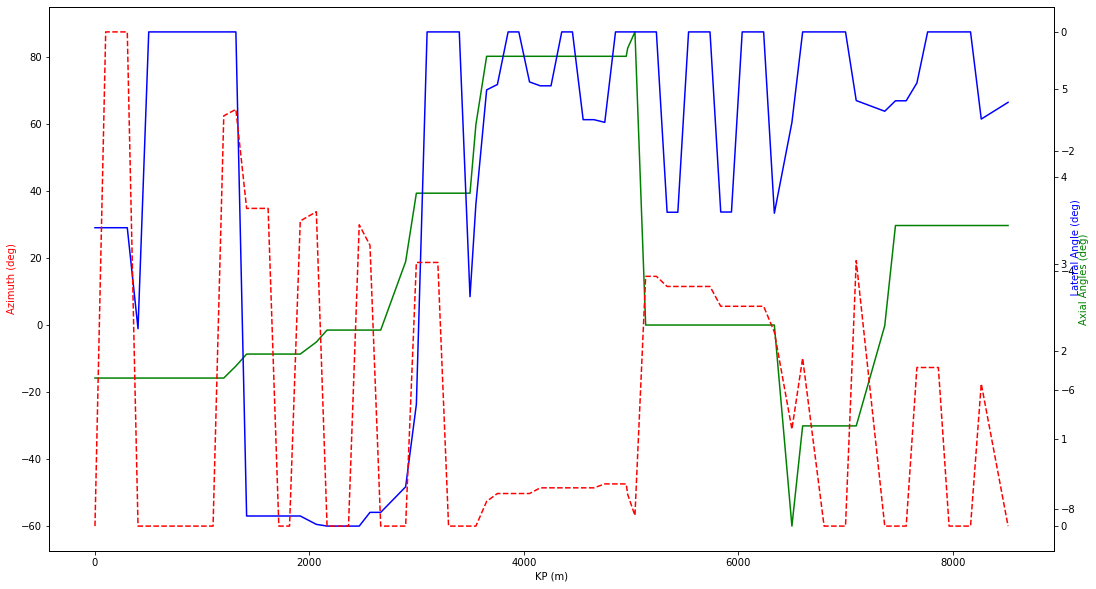

In [8]:
import matplotlib.pyplot as plt
x = df3["kp"]
y1 = df3["ax_an"]
y2 = df3["lat_an"]
y3 = df3["az_an"]
y4 = df3["z"]

fig, ax1 = plt.subplots(figsize=(18,10))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
# ax4 = ax1.twinx()
ax1.plot(x, y3, 'g-')
ax2.plot(x, y1, 'b-')
ax3.plot(x, y2, '--r')
# ax4.plot(x, y4, 'r-')

ax1.set_xlabel('KP (m)')
ax2.set_ylabel('Axial Angles (deg)', color='g')
ax3.set_ylabel('                    Lateral Angle (deg)', color='b')
ax1.set_ylabel('Azimuth (deg)', color='r')
# ax4.set_ylabel('Depth (m)', color='r')

plt.show()

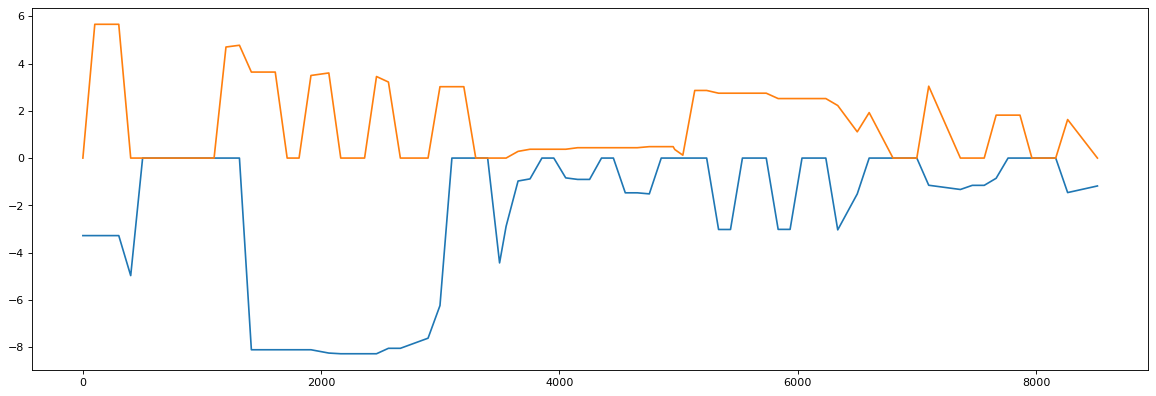

In [9]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df3["kp"],df3["ax_an"])
plt.plot(df3["kp"],df3["lat_an"])

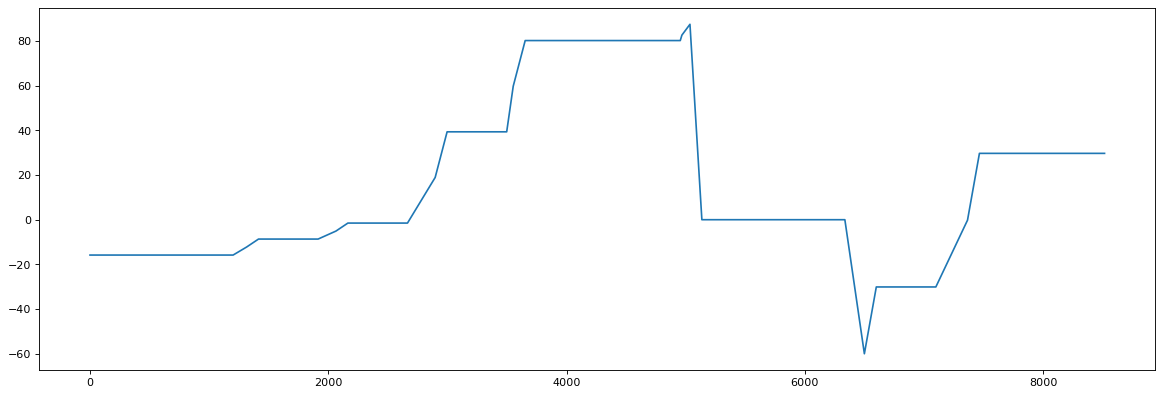

In [10]:
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df3["kp"],(df3["az_an"]))

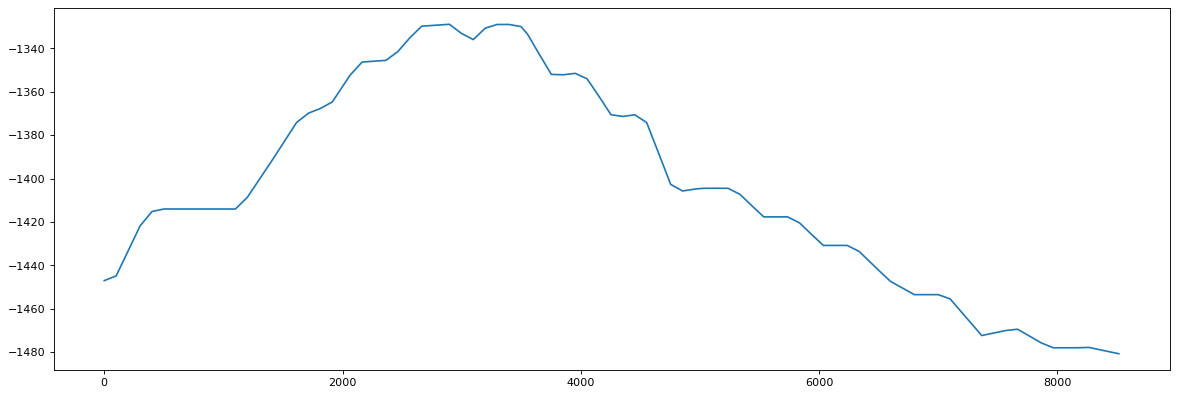

In [11]:
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df3["kp"],(df3["z"]))